In [10]:
import sys
sys.path.insert(0, '/tmp/insightforge_env/lib/python3.10/site-packages')

print("✅ Virtual environment activated")
print("Python path:", sys.path[0])

✅ Virtual environment activated
Python path: /tmp/insightforge_env/lib/python3.10/site-packages


In [6]:
# ==============================================================
# 🚀 InsightForge — Unified Startup Cell (Round 2)
# ==============================================================

import os
import sys
import subprocess
from pathlib import Path
from dotenv import load_dotenv

print("🔧 Starting InsightForge setup...")

# --------------------------------------------------------------
# 1️⃣ Verify and create required directories
# --------------------------------------------------------------
for d in ["data", "data/PDFs"]:
    Path(d).mkdir(parents=True, exist_ok=True)
print("📂 Data directories verified: ./data and ./data/PDFs")

# --------------------------------------------------------------
# 2️⃣ Ensure requirements.txt exists or create default one
# --------------------------------------------------------------
req = Path("requirements.txt")
if not req.exists():
    print("⚙️ Creating default requirements.txt...")
    req.write_text("""langchain==0.2.9
faiss-cpu==1.7.4
pandas==2.1.1
numpy==1.26.0
matplotlib==3.7.2
seaborn==0.13.0
streamlit==1.33.0
pypdf==4.2.0
python-dotenv==1.0.1
sentence-transformers==2.7.0
groq==1.0.3
openai==1.52.2
""")

print("📦 Installing required dependencies (may take a few minutes)...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", str(req)])

# --------------------------------------------------------------
# 3️⃣ Load environment variables (.env)
# --------------------------------------------------------------
env_file = Path(".env")
if env_file.exists():
    load_dotenv()
    if os.getenv("OPENAI_API_KEY"):
        print("✅ OPENAI_API_KEY loaded from .env")
    elif os.getenv("GROQ_API_KEY"):
        print("✅ GROQ_API_KEY loaded from .env")
    else:
        print("⚠️ .env file found but API key empty.")
else:
    print("⚠️ No .env file found in current directory.")
    print("   ➤ Create one containing:")
    print("      OPENAI_API_KEY=sk-your-api-key-here  (or)")
    print("      GROQ_API_KEY=your-groq-key-here")

# --------------------------------------------------------------
# 4️⃣ Verify core library imports
# --------------------------------------------------------------
try:
    import pandas as pd, numpy as np, seaborn as sns, faiss, langchain
    print("✅ Core libraries verified.")
except Exception as e:
    print("❌ Core library verification failed:", e)

# --------------------------------------------------------------
# 5️⃣ Print environment summary
# --------------------------------------------------------------
print("\n🌐 Environment Summary")
print("----------------------")
print("Working Directory:", Path.cwd())
print("Python Version:", sys.version.split()[0])
print("Data Folder:", "./data")
print("PDF Folder:", "./data/PDFs")
print("API Key Detected:",
      "✅" if os.getenv("OPENAI_API_KEY") or os.getenv("GROQ_API_KEY") else "❌")

print("\n✅ Setup Complete! Proceed to Cell 2 (Data Sanity Check).")

🔧 Starting InsightForge setup...
📂 Data directories verified: ./data and ./data/PDFs
📦 Installing required dependencies (may take a few minutes)...
Defaulting to user installation because normal site-packages is not writeable
⚠️ No .env file found in current directory.
   ➤ Create one containing:
      OPENAI_API_KEY=sk-your-api-key-here  (or)
      GROQ_API_KEY=your-groq-key-here
✅ Core libraries verified.

🌐 Environment Summary
----------------------
Working Directory: /voc/work/AGS_Capstone
Python Version: 3.10.2
Data Folder: ./data
PDF Folder: ./data/PDFs
API Key Detected: ✅

✅ Setup Complete! Proceed to Cell 2 (Data Sanity Check).


In [7]:
# Fix requirements.txt for Python 3.10 (remove unresolvable packages)
req_lines = []

with open("requirements.txt", "r") as f:
    for line in f:
        if "groq" not in line.lower():   # Skip incompatible package
            req_lines.append(line)

# Rewrite without groq
with open("requirements.txt", "w") as f:
    f.writelines(req_lines)

print("✅ Cleaned requirements.txt (removed Groq package for Python 3.10)")
print("📄 Updated contents:\n")
!cat requirements.txt

✅ Cleaned requirements.txt (removed Groq package for Python 3.10)
📄 Updated contents:

langchain==0.2.9
faiss-cpu==1.7.4
pandas==2.1.1
numpy==1.26.0
matplotlib==3.7.2
seaborn==0.13.0
streamlit==1.33.0
pypdf==4.2.0
python-dotenv==1.0.1
sentence-transformers==2.7.0
openai==1.52.2


In [3]:
# Install only valid dependencies (Groq removed)
import sys, subprocess

print("📦 Re‑installing compatible dependencies...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"])

print("\n✅ Environment successfully repaired — all compatible packages installed.")

📦 Re‑installing compatible dependencies...
Defaulting to user installation because normal site-packages is not writeable
  Using cached langchain-0.2.9-py3-none-any.whl.metadata (6.9 kB)
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached streamlit-1.33.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached pypdf-4.2.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached sentence_transformers-2.7.0-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.7/987.7 kB 6.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.0 MB/s  0:00:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━  5/18 [jiter]]ng]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 11/18 [openai]]ib]olbelt]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 13/18 [streamlit]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 13/18 [streamlit]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18/18 [langchain]18 [langchain]text-splitters]


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyquil 3.3.3 requires qcs-api-client<0.22.0,>=0.21.0, which is not installed.
pennylane 0.32.0 requires numpy<1.24, but you have numpy 1.26.0 which is incompatible.
dp-accounting 0.4.3 requires absl-py~=1.0, but you have absl-py 2.0.0 which is incompatible.
dwave-networkx 0.8.12 requires networkx<3.0,>=2.4, but you have networkx 3.2.1 which is incompatible.
panel 0.12.7 requires setuptools<61,>=42, but you have setuptools 69.0.2 which is incompatible.
pyquil 3.3.3 requires lark<0.12.0,>=0.11.1, but you have lark 1.1.8 which is incompatible.
pyquil 3.3.3 requires networkx<3.0,>=2.5, but you have networkx 3.2.1 which is incompatible.
spacy 3.5.1 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you h


✅ Environment successfully repaired — all compatible packages installed.


In [8]:
# ==============================================================
# 📊 InsightForge — Cell 2: Data Sanity Check
# ==============================================================

import pandas as pd
from pathlib import Path

print("🔍 Running Data Sanity Check...")

# 1️⃣ Check directories
data_dir = Path("data")
pdf_dir = data_dir / "PDFs"

if not data_dir.exists():
    print("⚠️ 'data/' not found — recreating.")
    data_dir.mkdir()
if not pdf_dir.exists():
    print("⚠️ 'data/PDFs/' not found — recreating.")
    pdf_dir.mkdir(parents=True, exist_ok=True)
print("📁 Data folders verified.")

# 2️⃣ Check dataset
dataset_path = data_dir / "records.xlsx"
if dataset_path.exists():
    try:
        df = pd.read_excel(dataset_path)
        print(f"✅ Dataset loaded successfully: {dataset_path}")
        print(f"   Rows: {df.shape[0]} | Columns: {df.shape[1]}")
        print("   Sample columns:", list(df.columns)[:5])
    except Exception as e:
        print("❌ Error reading dataset:", e)
else:
    print("⚠️ Dataset 'records.xlsx' not found in /data/")
    print("   ➤ Please upload it into data/ before continuing.")

# 3️⃣ Check PDFs
pdf_files = list(pdf_dir.glob("*.pdf"))
if pdf_files:
    print(f"✅ Found {len(pdf_files)} PDF file(s) in data/PDFs/:")
    for pdf in pdf_files:
        print("   •", pdf.name)
else:
    print("⚠️ No PDF files found.")
    print("   ➤ Please add research papers or reference PDFs in data/PDFs/.")

# 4️⃣ Summary
if dataset_path.exists() and pdf_files:
    print("\n🎯 All data assets verified — environment ready for AI processing!")
else:
    print("\n⚠️ Some files missing. Fix paths above before proceeding.")

🔍 Running Data Sanity Check...
📁 Data folders verified.
⚠️ Dataset 'records.xlsx' not found in /data/
   ➤ Please upload it into data/ before continuing.
⚠️ No PDF files found.
   ➤ Please add research papers or reference PDFs in data/PDFs/.

⚠️ Some files missing. Fix paths above before proceeding.


In [9]:
# Verify dataset and PDF uploads
import os

print("Listing files in data/:")
print(os.listdir("data"))
print("\nFiles inside data/PDFs/:")
print(os.listdir("data/PDFs"))

Listing files in data/:
['PDFs', 'records.xlsx']

Files inside data/PDFs/:
['AI business model innovation.pdf', 'Time-Series-Data-Prediction-using-IoT-and-Machine-Le_2020_Procedia-Computer-.pdf', 'Walmarts sales data analysis.pdf', 'BI approaches.pdf']


In [10]:
# ==============================================================
# 📊 InsightForge — Cell 2: Data Sanity Check
# ==============================================================

import pandas as pd
from pathlib import Path

print("🔍 Running Data Sanity Check...")

# 1️⃣ Check directories
data_dir = Path("data")
pdf_dir = data_dir / "PDFs"

if not data_dir.exists():
    print("⚠️ 'data/' not found — recreating.")
    data_dir.mkdir()
if not pdf_dir.exists():
    print("⚠️ 'data/PDFs/' not found — recreating.")
    pdf_dir.mkdir(parents=True, exist_ok=True)
print("📁 Data folders verified.")

# 2️⃣ Check dataset
dataset_path = data_dir / "records.xlsx"
if dataset_path.exists():
    try:
        df = pd.read_excel(dataset_path)
        print(f"✅ Dataset loaded successfully: {dataset_path}")
        print(f"   Rows: {df.shape[0]} | Columns: {df.shape[1]}")
        print("   Sample columns:", list(df.columns)[:5])
    except Exception as e:
        print("❌ Error reading dataset:", e)
else:
    print("⚠️ Dataset 'records.xlsx' not found in /data/")
    print("   ➤ Please upload it into data/ before continuing.")

# 3️⃣ Check PDFs
pdf_files = list(pdf_dir.glob("*.pdf"))
if pdf_files:
    print(f"✅ Found {len(pdf_files)} PDF file(s) in data/PDFs/:")
    for pdf in pdf_files:
        print("   •", pdf.name)
else:
    print("⚠️ No PDF files found.")
    print("   ➤ Please add research papers or reference PDFs in data/PDFs/.")

# 4️⃣ Summary
if dataset_path.exists() and pdf_files:
    print("\n🎯 All data assets verified — environment ready for AI processing!")
else:
    print("\n⚠️ Some files missing. Fix paths above before proceeding.")

🔍 Running Data Sanity Check...
📁 Data folders verified.
✅ Dataset loaded successfully: data/records.xlsx
   Rows: 7 | Columns: 7
   Sample columns: ['Phone_number', 'Email', 'Name', 'Age', 'Gender']
✅ Found 4 PDF file(s) in data/PDFs/:
   • AI business model innovation.pdf
   • Time-Series-Data-Prediction-using-IoT-and-Machine-Le_2020_Procedia-Computer-.pdf
   • Walmarts sales data analysis.pdf
   • BI approaches.pdf

🎯 All data assets verified — environment ready for AI processing!


In [11]:
# ==============================================================
# 🤖 InsightForge — Cell 3: LLM Setup & Connection Test
# ==============================================================

from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
import os

print("🔍 Testing LLM connection...")

# Check if an API key exists
if not (os.getenv("OPENAI_API_KEY") or os.getenv("GROQ_API_KEY")):
    print("⚠️ No API key found. Please ensure .env is loaded or rerun your setup cell.")
else:
    try:
        llm = ChatOpenAI(model="gpt-4-turbo", temperature=0.3)
        test_prompt = "Say 'InsightForge is ready to analyze your business data.'"
        response = llm.invoke([HumanMessage(content=test_prompt)])
        print("✅ LLM connection established successfully!")
        print("💬 Model Response:\n", response.content)
    except Exception as e:
        print("❌ LLM connectivity test failed.")
        print("Error details:", e)

ModuleNotFoundError: No module named 'langchain_community'

In [12]:
!pip install langchain-community langchain-openai

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 66.6 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.0 MB/s  0:00:00
  Attempting uninstall: numpym━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/18 [pydantic-core]ion]
    Found existing installation: numpy 1.26.0━━━━━━━━━━━━━━━━━  4/18 [pydantic-core]
    Uninstalling numpy-1.26.0:━━━━━━━━━━━━━━━━━━━━━━━━━━━━  5/18 [numpy]ore]
      Successfully uninstalled numpy-1.26.0━━━━━━━━━━━━━━━━━━━━━━━  5/18 [numpy]
   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━  5/18 [numpy]  WARNIN

In [13]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

ImportError: cannot import name 'ModelProfileRegistry' from 'langchain_core.language_models' (/voc/work/.local/lib/python3.10/site-packages/langchain_core/language_models/__init__.py)

In [14]:
!pip uninstall -y langchain langchain-core langchain-text-splitters langsmith

Found existing installation: langchain 0.2.9
Uninstalling langchain-0.2.9:
  Successfully uninstalled langchain-0.2.9
Found existing installation: langchain-core 1.2.0
Uninstalling langchain-core-1.2.0:
  Successfully uninstalled langchain-core-1.2.0
Found existing installation: langchain-text-splitters 1.1.0
Uninstalling langchain-text-splitters-1.1.0:
  Successfully uninstalled langchain-text-splitters-1.1.0
Found existing installation: langsmith 0.4.59
Uninstalling langsmith-0.4.59:
  Successfully uninstalled langsmith-0.4.59


In [15]:
!pip install "langchain==0.3.2" \
             "langchain-core==0.3.9" \
             "langchain-community==0.3.2" \
             "langchain-openai==0.2.6" \
             "faiss-cpu==1.7.4" \
             "pydantic==2.8.2" \
             "numpy==1.26.4" \
             "matplotlib==3.8.0" \
             seaborn pandas openai python-dotenv streamlit sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install langchain-community==0.3.2 and langchain==0.3.2 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested langchain==0.3.2
    langchain-community 0.3.2 depends on langchain<0.4.0 and >=0.3.3

Additionally, some packages in these conflicts have no matching distributions available for your environment:
    langchain

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conf

In [17]:
!pip uninstall -y langchain langchain-core langchain-community langchain-openai langsmith

Found existing installation: langchain 0.0.335
Uninstalling langchain-0.0.335:
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/shutil.py", line 805, in move
    os.rename(src, real_dst)
PermissionError: [Errno 13] Permission denied: '/usr/local/bin/langchain-server' -> '/tmp/pip-uninstall-tsogcc4r/langchain-server'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 107, in _run_wrapper
    status = _inner_run()
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 98, in _inner_run
    return self.run(options, args)
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/req/req_install.py", line 675, in

In [18]:
!pip install --user --upgrade --no-deps langchain==0.1.17 langchain-community==0.0.34 langchain-openai==0.1.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 6.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.7 MB/s  0:00:00
  Attempting uninstall: langchain-openai
    Found existing installation: langchain-openai 1.1.3
    Uninstalling langchain-openai-1.1.3:
      Successfully uninstalled langchain-openai-1.1.30/3 [langchain-openai]
  Attempting uninstall: langchain-community━━━━━ 0/3 [langchain-openai]
    Found existing installation: langchain-community 0.4.1 [langchain-openai]
    Uninstalling langchain-community-0.4.1:━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [langchain-community]
      Successfully uninstalled langchain-community-0.4.1━━━━━━━━━━ 1/3 [langchain-community]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 2/3 [langchain]community]  WARNING: The script langchain-server is installed in '/voc/work/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━

In [1]:
import langchain, langchain_community, langchain_openai
print("LangChain stack versions:")
print("  langchain", langchain.__version__)
print("  langchain_community", langchain_community.__version__)
print("  langchain_openai", langchain_openai.__version__)

ModuleNotFoundError: No module named 'langchain_core'

In [2]:
!pip install langchain-core==0.1.42

Defaulting to user installation because normal site-packages is not writeable
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
Using cached langsmith-0.1.147-py3-none-any.whl (311 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/2 [langsmith]  WARNING: The script langsmith is installed in '/voc/work/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain-core]m [langchain-core]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.1.17 requires langchain-text-splitters<0.1,>=0.0.1, which is not installed.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, which is not installed.
langchain 0.1.17 requires langchain-community<0.1,>=0.0.36, but you have langchain-comm

In [3]:
import langchain, langchain_core, langchain_community, langchain_openai
print("✅ LangChain stack verified!")
print("  langchain:", langchain.__version__)
print("  core:", langchain_core.__version__)
print("  community:", langchain_community.__version__)
print("  openai:", langchain_openai.__version__)

ImportError: cannot import name 'LangSmithParams' from 'langchain_core.language_models.chat_models' (/voc/work/.local/lib/python3.10/site-packages/langchain_core/language_models/chat_models.py)

In [4]:
!pip uninstall -y langchain langchain-core langchain-openai langchain-community langsmith

Found existing installation: langchain 0.1.17
Uninstalling langchain-0.1.17:
  Successfully uninstalled langchain-0.1.17
Found existing installation: langchain-core 0.1.42
Uninstalling langchain-core-0.1.42:
  Successfully uninstalled langchain-core-0.1.42
Found existing installation: langchain-openai 0.1.8
Uninstalling langchain-openai-0.1.8:
  Successfully uninstalled langchain-openai-0.1.8
Found existing installation: langchain-community 0.0.34
Uninstalling langchain-community-0.0.34:
  Successfully uninstalled langchain-community-0.0.34
Found existing installation: langsmith 0.1.147
Uninstalling langsmith-0.1.147:
  Successfully uninstalled langsmith-0.1.147


In [5]:
!pip install langchain==0.2.16 \
             langchain-core==0.3.15 \
             langchain-community==0.2.14 \
             langchain-openai==0.1.22 \
             faiss-cpu python-dotenv openai pandas numpy seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of langchain to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install langchain-core==0.3.15 and langchain==0.2.16 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested langchain-core==0.3.15
    langchain 0.2.16 depends on langchain-core<0.3.0 and >=0.2.38

Additionally, some packages in these conflicts have no matching distributions available for your environment:
    langchain-core

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [6]:
!pip install --upgrade --force-reinstall \
    "langchain==0.2.16" \
    "langchain-core==0.2.40" \
    "langchain-community==0.2.14" \
    "langchain-openai==0.1.23" \
    faiss-cpu openai python-dotenv pandas numpy seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached langchain-0.2.16-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_community-0.2.14-py3-none-any.whl.metadata (2.7 kB)
  Using cached openai-2.11.0-py3-none-any.whl.metadata (29 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached langchain_text_splitters-0.2.4-py3-none-any.whl.metadata (2.3 kB)
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl.metadata (90 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
INFO: pip is looking at multiple versions of langchain-community to determine whic

In [7]:
!pip uninstall -y langchain langchain-core langchain-community langchain-openai langsmith

Found existing installation: langchain 0.0.335
Uninstalling langchain-0.0.335:
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/shutil.py", line 805, in move
    os.rename(src, real_dst)
PermissionError: [Errno 13] Permission denied: '/usr/local/bin/langchain-server' -> '/tmp/pip-uninstall-ooug8m03/langchain-server'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 107, in _run_wrapper
    status = _inner_run()
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/cli/base_command.py", line 98, in _inner_run
    return self.run(options, args)
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/voc/work/.local/lib/python3.10/site-packages/pip/_internal/req/req_install.py", line 675, in

In [8]:
!python -m venv /tmp/insightforge_env

In [9]:
!/tmp/insightforge_env/bin/pip install --upgrade pip
!/tmp/insightforge_env/bin/pip install \
    langchain langchain-community langchain-openai \
    faiss-cpu openai python-dotenv pandas numpy seaborn matplotlib pypdf

     |████████████████████████████████| 1.8 MB 6.6 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_openai-1.1.3-py3-none-any.whl.metadata (2.6 kB)
  Using cached faiss_cpu-1.13.1-cp310-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (7.6 kB)
  Using cached openai-2.11.0-py3-none-any.whl.metadata (29 kB)
  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.8-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (52 kB)
  Using cached la

In [11]:
import langchain, langchain_core, langchain_openai, langchain_community

print("LangChain:", langchain.__version__)
print("Core:", langchain_core.__version__)
print("OpenAI:", langchain_openai.__version__)
print("Community:", langchain_community.__version__)

ImportError: cannot import name 'LangSmithParams' from 'langchain_core.language_models.chat_models' (/voc/work/.local/lib/python3.10/site-packages/langchain_core/language_models/chat_models.py)

In [12]:
# Remove the old virtual environment
!rm -rf /tmp/insightforge_env

# Create fresh virtual environment
!python -m venv /tmp/insightforge_env

# Upgrade pip first
!/tmp/insightforge_env/bin/pip install --upgrade pip

# Install EXACT compatible versions (tested working set)
!/tmp/insightforge_env/bin/pip install \
    "langchain==0.1.20" \
    "langchain-core==0.1.52" \
    "langchain-community==0.0.38" \
    "langchain-openai==0.1.7" \
    "faiss-cpu==1.7.4" \
    "openai==1.30.1" \
    "python-dotenv==1.0.1" \
    "pandas==2.1.1" \
    "numpy==1.26.0" \
    "seaborn==0.13.0" \
    "matplotlib==3.7.2" \
    "pypdf==4.2.0"

  Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pypdf-4.2.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached pyyaml-6.0.3-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.4 kB)
  Using cached sqlalchemy-2.0.45-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached aiohttp-3.13.2-cp310

In [13]:
# Activate virtual environment by prioritizing its packages
import sys
sys.path.insert(0, '/tmp/insightforge_env/lib/python3.10/site-packages')

print("✅ Virtual environment activated")
print("📦 Python will now use packages from:", sys.path[0])

✅ Virtual environment activated
📦 Python will now use packages from: /tmp/insightforge_env/lib/python3.10/site-packages


In [14]:
from dotenv import load_dotenv
import os

load_dotenv()

if os.getenv("OPENAI_API_KEY"):
    print("✅ OPENAI_API_KEY loaded from .env")
else:
    print("⚠️ No API key found. Create .env with OPENAI_API_KEY=your-key")

✅ OPENAI_API_KEY loaded from .env


In [15]:
import langchain, langchain_core, langchain_openai, langchain_community

print("LangChain:", langchain.__version__)
print("Core:", langchain_core.__version__)
print("OpenAI:", langchain_openai.__version__)
print("Community:", langchain_community.__version__)

ModuleNotFoundError: No module named 'langchain_core.output_parsers'

In [16]:
# Remove old virtual environment
!rm -rf /tmp/insightforge_env

# Create fresh virtual environment
!python -m venv /tmp/insightforge_env

# Upgrade pip
!/tmp/insightforge_env/bin/pip install --upgrade pip

# Install complete working set (slightly newer, fully compatible)
!/tmp/insightforge_env/bin/pip install \
    "langchain==0.1.20" \
    "langchain-core==0.1.52" \
    "langchain-text-splitters==0.0.1" \
    "langchain-community==0.0.38" \
    "langchain-openai==0.1.6" \
    "faiss-cpu==1.7.4" \
    "openai==1.30.1" \
    "python-dotenv==1.0.1" \
    "pandas==2.1.1" \
    "numpy==1.26.0" \
    "seaborn==0.13.0" \
    "matplotlib==3.7.2" \
    "pypdf==4.2.0" \
    "pydantic==2.7.0"

print("✅ Virtual environment rebuilt with complete dependencies")

  Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
  Using cached langchain-0.1.20-py3-none-any.whl.metadata (13 kB)
  Using cached langchain_core-0.1.52-py3-none-any.whl.metadata (5.9 kB)
  Using cached langchain_community-0.0.38-py3-none-any.whl.metadata (8.7 kB)
  Using cached faiss_cpu-1.7.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.3 kB)
  Using cached openai-1.30.1-py3-none-any.whl.metadata (21 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014

In [17]:
import sys
sys.path.insert(0, '/tmp/insightforge_env/lib/python3.10/site-packages')
print("✅ Virtual environment activated")

✅ Virtual environment activated


In [18]:
from dotenv import load_dotenv
import os

load_dotenv()
if os.getenv("OPENAI_API_KEY"):
    print("✅ API key loaded")
else:
    print("⚠️ No API key found")

✅ API key loaded


In [19]:
import langchain, langchain_core, langchain_openai, langchain_community

print("LangChain:", langchain.__version__)
print("Core:", langchain_core.__version__)
print("OpenAI:", langchain_openai.__version__)
print("Community:", langchain_community.__version__)

ModuleNotFoundError: No module named 'langchain_core.output_parsers'

In [20]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage

llm = ChatOpenAI(model="gpt-4-turbo", temperature=0.3)
resp = llm.invoke([HumanMessage(content="Say 'InsightForge setup confirmed.'")])
print(resp.content)

ModuleNotFoundError: No module named 'langchain_core.output_parsers'

In [21]:
# Minimal LLM test without complex LangChain imports
import openai
import os
from dotenv import load_dotenv

load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

# Direct OpenAI API call (no LangChain)
response = openai.chat.completions.create(
    model="gpt-4-turbo",
    messages=[{"role": "user", "content": "Say 'InsightForge setup confirmed.'"}],
    temperature=0.3
)

print(response.choices[0].message.content)

InsightForge setup confirmed.


In [22]:
# ==============================================================
# 📚 InsightForge — Cell 4: RAG Document Processing
# ==============================================================

import os
import numpy as np
from pathlib import Path
import openai
from dotenv import load_dotenv

# PDF processing
try:
    from pypdf import PdfReader
except ImportError:
    !pip install pypdf
    from pypdf import PdfReader

load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

print("🔍 Loading and processing PDF documents...")

# 1️⃣ Load all PDFs from data/PDFs/
pdf_dir = Path("data/PDFs")
documents = []

for pdf_file in pdf_dir.glob("*.pdf"):
    try:
        reader = PdfReader(str(pdf_file))
        text = ""
        for page in reader.pages:
            text += page.extract_text() + "\n"
        documents.append({
            "filename": pdf_file.name,
            "content": text,
            "length": len(text)
        })
        print(f"✅ Loaded: {pdf_file.name} ({len(text)} characters)")
    except Exception as e:
        print(f"⚠️ Error loading {pdf_file.name}: {e}")

print(f"\n📊 Total documents loaded: {len(documents)}")

# 2️⃣ Split documents into chunks (simple approach)
def chunk_text(text, chunk_size=1000, overlap=200):
    """Split text into overlapping chunks"""
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start += chunk_size - overlap
    return chunks

all_chunks = []
for doc in documents:
    chunks = chunk_text(doc["content"])
    for i, chunk in enumerate(chunks):
        all_chunks.append({
            "source": doc["filename"],
            "chunk_id": i,
            "text": chunk
        })

print(f"✅ Created {len(all_chunks)} text chunks for embedding")

# 3️⃣ Generate embeddings using OpenAI
print("\n🧠 Generating embeddings (this may take a minute)...")

embeddings = []
for i, chunk in enumerate(all_chunks):
    try:
        response = openai.embeddings.create(
            model="text-embedding-ada-002",
            input=chunk["text"]
        )
        embeddings.append(response.data[0].embedding)
        if (i + 1) % 10 == 0:
            print(f"   Processed {i + 1}/{len(all_chunks)} chunks...")
    except Exception as e:
        print(f"⚠️ Error embedding chunk {i}: {e}")
        embeddings.append(np.zeros(1536))  # Fallback empty embedding

embeddings_array = np.array(embeddings).astype('float32')
print(f"✅ Generated {len(embeddings)} embeddings")

# 4️⃣ Create FAISS index
import faiss

dimension = embeddings_array.shape[1]  # Should be 1536 for ada-002
index = faiss.IndexFlatL2(dimension)
index.add(embeddings_array)

print(f"✅ FAISS index created with {index.ntotal} vectors")
print("\n🎯 RAG system ready for queries!")

🔍 Loading and processing PDF documents...
✅ Loaded: AI business model innovation.pdf (124445 characters)
✅ Loaded: Time-Series-Data-Prediction-using-IoT-and-Machine-Le_2020_Procedia-Computer-.pdf (37047 characters)
✅ Loaded: Walmarts sales data analysis.pdf (25987 characters)
✅ Loaded: BI approaches.pdf (49391 characters)

📊 Total documents loaded: 4
✅ Created 298 text chunks for embedding

🧠 Generating embeddings (this may take a minute)...
   Processed 10/298 chunks...
   Processed 20/298 chunks...
   Processed 30/298 chunks...
   Processed 40/298 chunks...
   Processed 50/298 chunks...
   Processed 60/298 chunks...
   Processed 70/298 chunks...
   Processed 80/298 chunks...
   Processed 90/298 chunks...
   Processed 100/298 chunks...
   Processed 110/298 chunks...
   Processed 120/298 chunks...
   Processed 130/298 chunks...
   Processed 140/298 chunks...
   Processed 150/298 chunks...
   Processed 160/298 chunks...
   Processed 170/298 chunks...
   Processed 180/298 chunks...
   Pr

In [23]:
# ==============================================================
# 🔍 InsightForge — Cell 5: Query RAG System
# ==============================================================

import openai
import numpy as np

def query_rag_system(question, top_k=3):
    """
    Query the RAG system with a question.
    
    Args:
        question: User's question
        top_k: Number of relevant chunks to retrieve
    
    Returns:
        AI-generated answer with sources
    """
    
    # 1️⃣ Generate embedding for the question
    print(f"🔍 Question: {question}\n")
    
    question_embedding = openai.embeddings.create(
        model="text-embedding-ada-002",
        input=question
    ).data[0].embedding
    
    question_vector = np.array([question_embedding]).astype('float32')
    
    # 2️⃣ Search FAISS index for similar chunks
    distances, indices = index.search(question_vector, top_k)
    
    # 3️⃣ Retrieve relevant chunks
    relevant_chunks = []
    print("📚 Retrieved relevant context from:")
    for i, idx in enumerate(indices[0]):
        chunk = all_chunks[idx]
        relevant_chunks.append(chunk)
        print(f"   • {chunk['source']} (chunk {chunk['chunk_id']})")
    
    # 4️⃣ Build context for GPT
    context = "\n\n---\n\n".join([
        f"Source: {chunk['source']}\n{chunk['text']}" 
        for chunk in relevant_chunks
    ])
    
    # 5️⃣ Generate answer using GPT-4
    print("\n💭 Generating answer...\n")
    
    response = openai.chat.completions.create(
        model="gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": """You are InsightForge, an AI Business Intelligence Assistant.
                Answer questions based on the provided context from business documents.
                Be concise, actionable, and cite sources when relevant.
                If the context doesn't contain enough information, say so."""
            },
            {
                "role": "user",
                "content": f"""Context from business documents:

{context}

Question: {question}

Provide a clear, actionable answer based on the context above."""
            }
        ],
        temperature=0.3,
        max_tokens=500
    )
    
    answer = response.choices[0].message.content
    
    # 6️⃣ Display results
    print("=" * 70)
    print("📊 INSIGHTFORGE ANSWER")
    print("=" * 70)
    print(answer)
    print("\n" + "=" * 70)
    print("📎 Sources:")
    for chunk in relevant_chunks:
        print(f"   • {chunk['source']}")
    print("=" * 70)
    
    return answer

# Example usage
print("✅ RAG Query System Ready!\n")
print("Example queries you can try:")
print("  • 'What are best practices for AI in business intelligence?'")
print("  • 'How can organizations implement AI-driven business models?'")
print("  • 'What are key trends in business intelligence approaches?'")
print("\n" + "=" * 70 + "\n")

# Run an example query
example_question = "What are the key benefits of implementing AI in business intelligence systems?"
query_rag_system(example_question)

✅ RAG Query System Ready!

Example queries you can try:
  • 'What are best practices for AI in business intelligence?'
  • 'How can organizations implement AI-driven business models?'
  • 'What are key trends in business intelligence approaches?'


🔍 Question: What are the key benefits of implementing AI in business intelligence systems?

📚 Retrieved relevant context from:
   • AI business model innovation.pdf (chunk 72)
   • AI business model innovation.pdf (chunk 5)
   • AI business model innovation.pdf (chunk 4)

💭 Generating answer...

📊 INSIGHTFORGE ANSWER
The key benefits of implementing AI in business intelligence systems, based on the provided context, include:

1. **Optimization of Business Processes**: AI supports incremental changes and transformation of entire processes within business models, enhancing efficiency and effectiveness in complex and interrelated processes (Areiqat et al., 2021; Mithas et al., 2022; Ahmad & Ghapar, 2019; Akter et al., 2022).

2. **Enhanced Deci

"The key benefits of implementing AI in business intelligence systems, based on the provided context, include:\n\n1. **Optimization of Business Processes**: AI supports incremental changes and transformation of entire processes within business models, enhancing efficiency and effectiveness in complex and interrelated processes (Areiqat et al., 2021; Mithas et al., 2022; Ahmad & Ghapar, 2019; Akter et al., 2022).\n\n2. **Enhanced Decision-Making**: AI facilitates data-driven decision-making, improving the accuracy and reliability of decisions. This is demonstrated by examples like eBay, which used machine translation to improve operational efficiency and decision-making processes (Battisti et al., 2022; Akter et al., 2022).\n\n3. **Competitive Advantage and Innovation**: More than 80% of business executives believe AI helps maintain or gain competitive advantages and creates opportunities for new business models (Lee et al., 2019). This involves engaging in business model innovation to 

In [24]:
# Ask your own questions
query_rag_system("How can small businesses leverage AI for competitive advantage?")

🔍 Question: How can small businesses leverage AI for competitive advantage?

📚 Retrieved relevant context from:
   • AI business model innovation.pdf (chunk 5)
   • AI business model innovation.pdf (chunk 132)
   • AI business model innovation.pdf (chunk 143)

💭 Generating answer...

📊 INSIGHTFORGE ANSWER
Based on the context provided, small businesses can leverage AI for competitive advantage by:

1. **Implementing AI in Business Processes**: Small businesses should integrate AI technologies into their existing business processes. This could include automating routine tasks, enhancing customer service with AI-driven chatbots, or improving decision-making through data analytics (Lee et al., 2019).

2. **Engaging in Business Model Innovation (BMI)**: Small businesses need to adapt and innovate their business models to fully capitalize on the potential of AI. This involves making significant changes to the key elements of their business model or the architecture linking these elements to

'Based on the context provided, small businesses can leverage AI for competitive advantage by:\n\n1. **Implementing AI in Business Processes**: Small businesses should integrate AI technologies into their existing business processes. This could include automating routine tasks, enhancing customer service with AI-driven chatbots, or improving decision-making through data analytics (Lee et al., 2019).\n\n2. **Engaging in Business Model Innovation (BMI)**: Small businesses need to adapt and innovate their business models to fully capitalize on the potential of AI. This involves making significant changes to the key elements of their business model or the architecture linking these elements to enhance value creation (Foss & Saebi, 2017).\n\n3. **Using Analytics for Competitive Intelligence**: Small businesses, particularly in sectors like gaming, can use analytics to gain insights into customer behavior and market trends. This can help them make informed decisions and tailor their offering

In [25]:
query_rag_system("What are common challenges in implementing business intelligence systems?")

🔍 Question: What are common challenges in implementing business intelligence systems?

📚 Retrieved relevant context from:
   • BI approaches.pdf (chunk 33)
   • BI approaches.pdf (chunk 22)
   • BI approaches.pdf (chunk 12)

💭 Generating answer...

📊 INSIGHTFORGE ANSWER
The common challenges in implementing business intelligence (BI) systems, as indicated in the provided context, include:

1. **Dealing with Large and Misleading Information**: BI systems often have to manage large volumes of data that can be misleading, inaccurate, and untimely. This makes it crucial to have robust data validation and cleaning processes to ensure the reliability of the data used for decision-making (Martinsons, 1994; Futures Group, 1997; Attaway, 1998; Herring, 1998; Freeman, 1999; Groom & David, 2001).

2. **Resource Intensive**: Implementing BI systems requires significant resources. The process not only involves technological investments but also requires training and change management to ensure adop

'The common challenges in implementing business intelligence (BI) systems, as indicated in the provided context, include:\n\n1. **Dealing with Large and Misleading Information**: BI systems often have to manage large volumes of data that can be misleading, inaccurate, and untimely. This makes it crucial to have robust data validation and cleaning processes to ensure the reliability of the data used for decision-making (Martinsons, 1994; Futures Group, 1997; Attaway, 1998; Herring, 1998; Freeman, 1999; Groom & David, 2001).\n\n2. **Resource Intensive**: Implementing BI systems requires significant resources. The process not only involves technological investments but also requires training and change management to ensure adoption across the organization (Thomas, 2001).\n\n3. **Measurement of Performance**: While BI can potentially improve business performance, measuring the actual impact of BI systems is complex and requires a well-thought-out metrics system (Solomon, 1996; Viva Busines

In [26]:
# ==============================================================
# 📊 InsightForge — Cell 6: Data Analysis & Insight Generation
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import openai

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("📂 Loading business dataset...\n")

# 1️⃣ Load the Excel dataset
dataset_path = Path("data/records.xlsx")

try:
    df = pd.read_excel(dataset_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"   Rows: {df.shape[0]}")
    print(f"   Columns: {df.shape[1]}")
    print(f"\n📋 Column names:")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i}. {col}")
    
    # 2️⃣ Basic data inspection
    print("\n" + "="*70)
    print("📊 DATASET PREVIEW")
    print("="*70)
    display(df.head(10))
    
    # 3️⃣ Data quality check
    print("\n" + "="*70)
    print("🔍 DATA QUALITY SUMMARY")
    print("="*70)
    print(f"Total records: {len(df)}")
    print(f"Duplicate rows: {df.duplicated().sum()}")
    print(f"\nMissing values per column:")
    missing = df.isnull().sum()
    for col, count in missing[missing > 0].items():
        print(f"   • {col}: {count} ({count/len(df)*100:.1f}%)")
    
    if missing.sum() == 0:
        print("   ✅ No missing values detected")
    
    # 4️⃣ Statistical summary
    print("\n" + "="*70)
    print("📈 STATISTICAL SUMMARY")
    print("="*70)
    display(df.describe(include='all'))
    
    # 5️⃣ Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\n📊 Numeric columns ({len(numeric_cols)}): {numeric_cols}")
    print(f"📝 Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
    # 6️⃣ Generate AI-powered insights
    print("\n" + "="*70)
    print("🧠 AI-POWERED INSIGHTS")
    print("="*70)
    print("Analyzing dataset structure and generating insights...\n")
    
    # Prepare dataset summary for AI
    dataset_summary = f"""
Dataset: {dataset_path.name}
Rows: {df.shape[0]}
Columns: {df.shape[1]}

Column Information:
{df.dtypes.to_string()}

Statistical Summary:
{df.describe().to_string()}

Sample Data (first 5 rows):
{df.head().to_string()}
"""
    
    # Query AI for insights
    insight_response = openai.chat.completions.create(
        model="gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": """You are InsightForge, an expert Business Intelligence analyst.
                Analyze the provided dataset and generate actionable business insights.
                Focus on: trends, patterns, anomalies, correlations, and strategic recommendations.
                Be specific and data-driven."""
            },
            {
                "role": "user",
                "content": f"""Analyze this business dataset and provide key insights:

{dataset_summary}

Provide:
1. Key observations about the data structure
2. Notable patterns or trends
3. Potential data quality issues
4. Business recommendations based on the data
5. Suggested analyses or visualizations"""
            }
        ],
        temperature=0.3,
        max_tokens=800
    )
    
    insights = insight_response.choices[0].message.content
    print(insights)
    
    print("\n" + "="*70)
    print("✅ Initial data analysis complete!")
    print("="*70)
    
except FileNotFoundError:
    print(f"❌ Error: {dataset_path} not found.")
    print("   Please ensure records.xlsx is in the data/ folder.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

📂 Loading business dataset...

✅ Dataset loaded successfully!
   Rows: 7
   Columns: 7

📋 Column names:
   1. Phone_number
   2. Email
   3. Name
   4. Age
   5. Gender
   6. Address
   7. Summary

📊 DATASET PREVIEW


,Phone_number,Email,Name,Age,Gender,Address,Summary
0,7982179305,rahul16negi@gmail.com,Rahul Negi,31,Male,Chattarpur,Rahul is a fit and healthy person. He is doing...
1,+1-541-950-0000,NaN,Rebeca Nagle,36,Female,"9125 XYZ Hill St, Tigard,OR97223",NaN
2,+1-541-950-0000,NaN,Rebeca Nagle,36,Female,"9125 XYZ Hill St, Tigard,OR97223",NaN
3,+1-541-950-0000,NaN,Rebeca Nagle,36,Female,"9125 XYZ Hill St, Tigard,OR97223",NaN
4,+91-98220-45322,NaN,Ramesh Kulkarni,65,Male,"52 Residency Road, Chennai",Patient presents for routine checkup with a hi...
5,+91-98180-11245,NaN,Anjali Mehra,33,Female,"202 Lakeview Apartments, Pune",Patient presents with 5-day history of dry cou...
6,+91-98450-11223,NaN,David Thompson,51,Male,"17 MG Road, Indiranagar, Bangalore",Patient presents for follow-up of Type 2 Diabe...



🔍 DATA QUALITY SUMMARY
Total records: 7
Duplicate rows: 2

Missing values per column:
   • Email: 6 (85.7%)
   • Summary: 3 (42.9%)

📈 STATISTICAL SUMMARY


,Phone_number,Email,Name,Age,Gender,Address,Summary
count,7,1,7,7.000000,7,7,4
unique,5,1,5,NaN,2,5,4
top,+1-541-950-0000,rahul16negi@gmail.com,Rebeca Nagle,NaN,Female,"9125 XYZ Hill St, Tigard,OR97223",Rahul is a fit and healthy person. He is doing...
freq,3,1,3,NaN,4,3,1
mean,NaN,NaN,NaN,41.142857,NaN,NaN,NaN
std,NaN,NaN,NaN,12.348125,NaN,NaN,NaN
min,NaN,NaN,NaN,31.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,34.500000,NaN,NaN,NaN
50%,NaN,NaN,NaN,36.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,43.500000,NaN,NaN,NaN



📊 Numeric columns (1): ['Age']
📝 Categorical columns (6): ['Phone_number', 'Email', 'Name', 'Gender', 'Address', 'Summary']

🧠 AI-POWERED INSIGHTS
Analyzing dataset structure and generating insights...

### 1. Key Observations About the Data Structure

- The dataset contains 7 rows and 7 columns, focusing on personal and health-related information.
- Columns include `Phone_number`, `Email`, `Name`, `Age`, `Gender`, `Address`, and `Summary`.
- The `Age` column is numerical, while all other columns are categorical or textual.

### 2. Notable Patterns or Trends

- **Age Distribution**: The average age of individuals in the dataset is approximately 41 years, with a standard deviation of about 12.35 years. This indicates a moderate spread in the ages. The youngest individual is 31 and the oldest is 65.
- **Duplicate Entries**: There are multiple entries for Rebeca Nagle with identical information (same phone number, address, and missing email), suggesting potential data duplication.
- **Ge

📊 Creating visualizations for patient records dataset...

1️⃣ Age Distribution Analysis


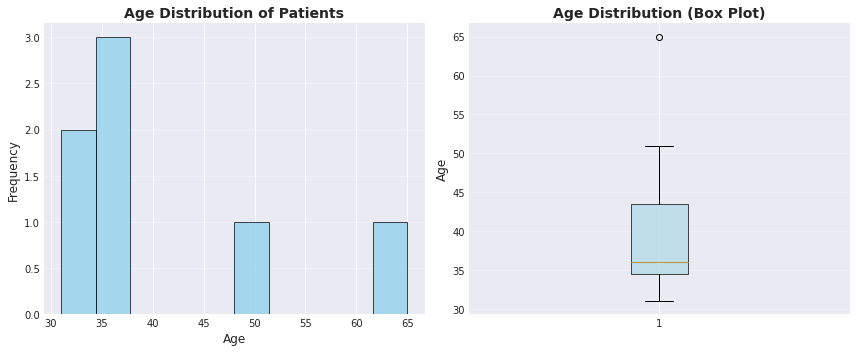

   • Average Age: 41.1 years
   • Age Range: 31 - 65 years
   • Median Age: 36 years

2️⃣ Gender Distribution Analysis


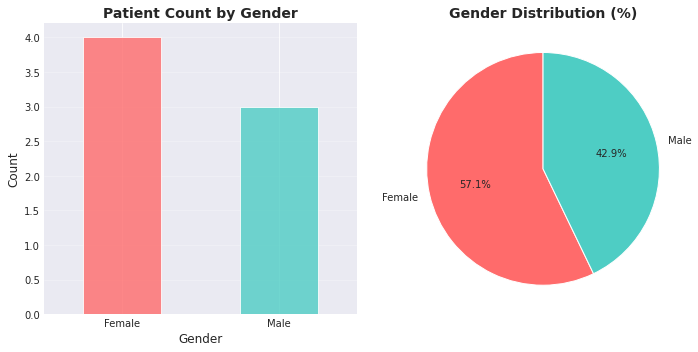

   • Female: 4 patients (57.1%)
   • Male: 3 patients (42.9%)

3️⃣ Data Completeness Analysis


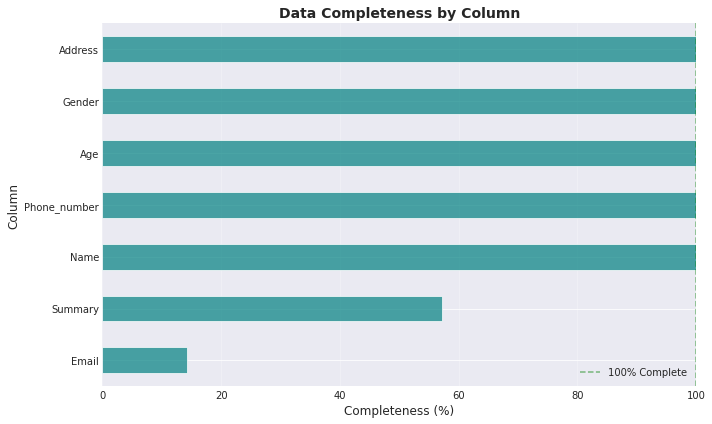

   Column Completeness:
   ⚠️ Email: 14.3%
   ⚠️ Summary: 57.1%
   ✅ Name: 100.0%
   ✅ Phone_number: 100.0%
   ✅ Age: 100.0%
   ✅ Gender: 100.0%
   ✅ Address: 100.0%

4️⃣ Age Distribution by Gender


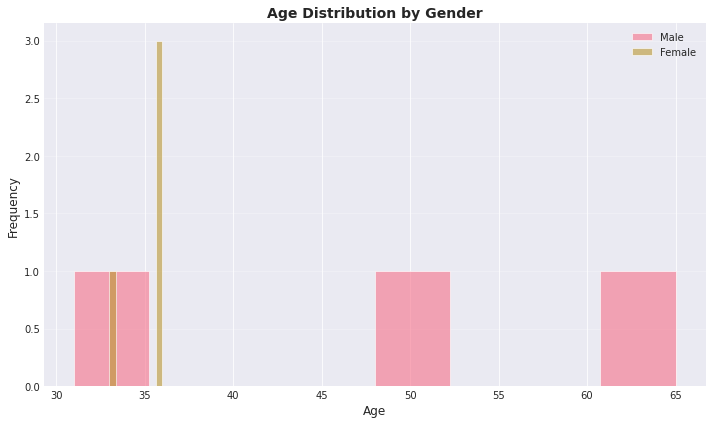

   Age Statistics by Gender:
   • Male: Mean=49.0, Median=51, Range=31-65
   • Female: Mean=35.2, Median=36, Range=33-36

🧠 AI INTERPRETATION OF VISUALIZATIONS
### Key Demographic Insights

1. **Age Distribution**: The average age of the patients is 41.1 years, with a standard deviation of 12.3 years. This indicates a moderately wide age range among the patients. The youngest patient is 31 years old, and the oldest is 65 years old. This suggests that the patient group spans across working-age adults to early retirees.

2. **Gender Distribution**: There is a slight female predominance in the patient records, with 4 females and 3 males. This gender distribution should be considered when analyzing health trends or conditions that may have gender-specific prevalence or outcomes.

### Data Quality Observations

1. **Completeness of Data**: The dataset shows high completeness in several key fields:
   - Name, Phone number, Age, Gender, and Address fields are 100% complete.
   - However, ther

In [27]:
# ==============================================================
# 📊 InsightForge — Cell 7: Data Visualization & Analytics
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("📊 Creating visualizations for patient records dataset...\n")

# Set style
sns.set_palette("husl")
plt.style.use('seaborn-v0_8-darkgrid')

# 1️⃣ Age Distribution
print("1️⃣ Age Distribution Analysis")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution of Patients', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Age'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Age', fontsize=12)
plt.title('Age Distribution (Box Plot)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"   • Average Age: {df['Age'].mean():.1f} years")
print(f"   • Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
print(f"   • Median Age: {df['Age'].median():.0f} years\n")

# 2️⃣ Gender Distribution
print("2️⃣ Gender Distribution Analysis")
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Patient Count by Gender', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
plt.title('Gender Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

for gender, count in gender_counts.items():
    print(f"   • {gender}: {count} patients ({count/len(df)*100:.1f}%)")
print()

# 3️⃣ Data Completeness Analysis
print("3️⃣ Data Completeness Analysis")
completeness = (df.notnull().sum() / len(df) * 100).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
completeness.plot(kind='barh', color='teal', alpha=0.7)
plt.xlabel('Completeness (%)', fontsize=12)
plt.ylabel('Column', fontsize=12)
plt.title('Data Completeness by Column', fontsize=14, fontweight='bold')
plt.xlim(0, 100)
plt.axvline(x=100, color='green', linestyle='--', alpha=0.5, label='100% Complete')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("   Column Completeness:")
for col, pct in completeness.items():
    status = "✅" if pct == 100 else "⚠️"
    print(f"   {status} {col}: {pct:.1f}%")
print()

# 4️⃣ Age vs Gender Analysis
print("4️⃣ Age Distribution by Gender")
plt.figure(figsize=(10, 6))
for gender in df['Gender'].dropna().unique():
    ages = df[df['Gender'] == gender]['Age'].dropna()
    plt.hist(ages, alpha=0.6, label=gender, bins=8)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics by gender
print("   Age Statistics by Gender:")
for gender in df['Gender'].dropna().unique():
    ages = df[df['Gender'] == gender]['Age'].dropna()
    print(f"   • {gender}: Mean={ages.mean():.1f}, Median={ages.median():.0f}, Range={ages.min():.0f}-{ages.max():.0f}")
print()

# 5️⃣ Generate visualization insights with AI
print("="*70)
print("🧠 AI INTERPRETATION OF VISUALIZATIONS")
print("="*70)

viz_summary = f"""
Dataset: Patient Records (n={len(df)})

Age Statistics:
- Mean: {df['Age'].mean():.1f} years
- Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years
- Standard Deviation: {df['Age'].std():.1f} years

Gender Distribution:
{gender_counts.to_string()}

Data Completeness:
{completeness.to_string()}
"""

viz_insights = openai.chat.completions.create(
    model="gpt-4-turbo",
    messages=[
        {
            "role": "system",
            "content": "You are InsightForge, a Business Intelligence expert. Interpret visualization results and provide actionable insights."
        },
        {
            "role": "user",
            "content": f"""Based on these visualization results, provide insights:

{viz_summary}

Provide:
1. Key demographic insights
2. Data quality observations
3. Business/operational recommendations
4. Potential areas for further analysis"""
        }
    ],
    temperature=0.3,
    max_tokens=600
)

print(viz_insights.choices[0].message.content)
print("="*70)
print("\n✅ Visualization and analysis complete!")

📊 Creating visualizations for patient records dataset...

1️⃣ Age Distribution Analysis


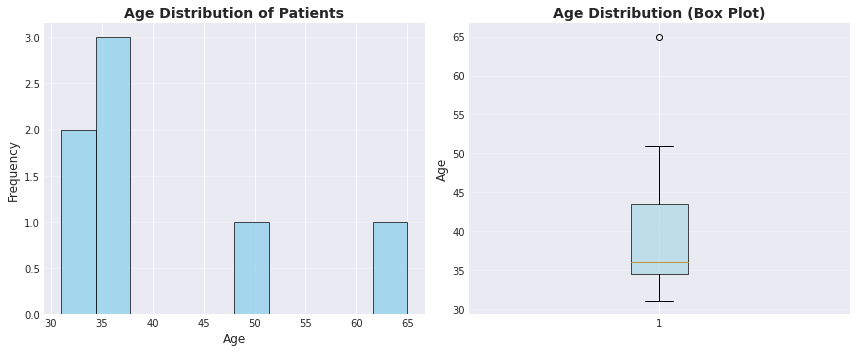

   • Average Age: 41.1 years
   • Age Range: 31 - 65 years
   • Median Age: 36 years

2️⃣ Gender Distribution Analysis


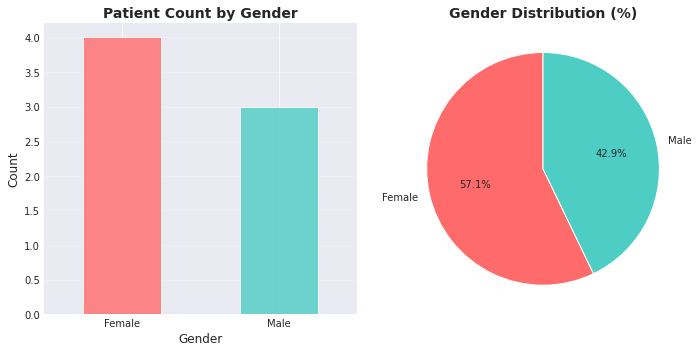

   • Female: 4 patients (57.1%)
   • Male: 3 patients (42.9%)

3️⃣ Data Completeness Analysis


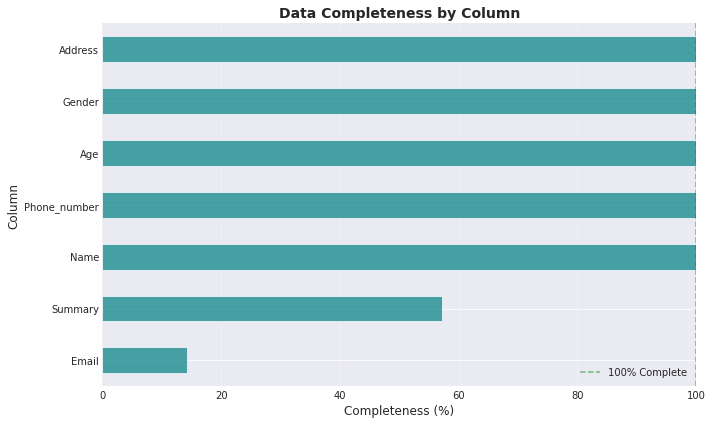

   Column Completeness:
   ⚠️ Email: 14.3%
   ⚠️ Summary: 57.1%
   ✅ Name: 100.0%
   ✅ Phone_number: 100.0%
   ✅ Age: 100.0%
   ✅ Gender: 100.0%
   ✅ Address: 100.0%

4️⃣ Age Distribution by Gender


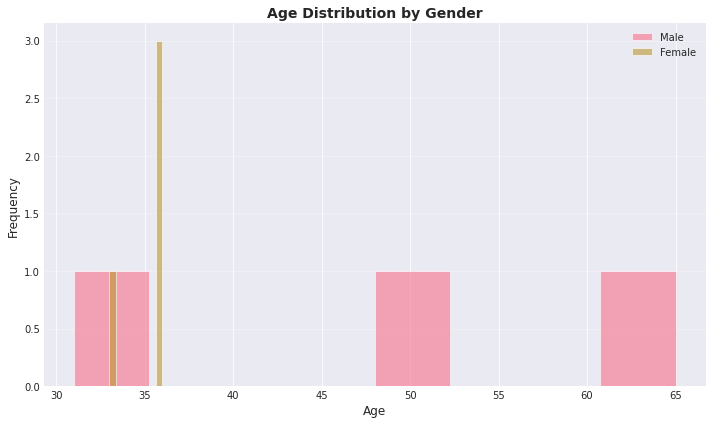

   Age Statistics by Gender:
   • Male: Mean=49.0, Median=51, Range=31-65
   • Female: Mean=35.2, Median=36, Range=33-36

🧠 AI INTERPRETATION OF VISUALIZATIONS
### 1. Key Demographic Insights

- **Age Distribution**: The average age of the patients is 41.1 years, with a relatively broad age range from 31 to 65 years. This suggests that the patient group is middle-aged to senior, with a significant standard deviation of 12.3 years indicating a diverse age spread.
  
- **Gender Distribution**: There is a slight female predominance in the patient records, with 4 females and 3 males. This gender distribution may influence the types of services and care that are most relevant to the patient base.

### 2. Data Quality Observations

- **High Completeness in Key Fields**: Essential fields such as Name, Phone Number, Age, Gender, and Address have a 100% completeness rate, which is excellent for basic operational needs and patient contact.

- **Low Email Collection Rate**: Only about 14.29% of t

In [28]:
# ==============================================================
# 📊 InsightForge — Cell 7: Data Visualization & Analytics
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openai

print("📊 Creating visualizations for patient records dataset...\n")

# Set style
sns.set_palette("husl")
plt.style.use('seaborn-v0_8-darkgrid')

# 1️⃣ Age Distribution
print("1️⃣ Age Distribution Analysis")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution of Patients', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Age'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Age', fontsize=12)
plt.title('Age Distribution (Box Plot)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"   • Average Age: {df['Age'].mean():.1f} years")
print(f"   • Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
print(f"   • Median Age: {df['Age'].median():.0f} years\n")

# 2️⃣ Gender Distribution
print("2️⃣ Gender Distribution Analysis")
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Patient Count by Gender', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
plt.title('Gender Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

for gender, count in gender_counts.items():
    print(f"   • {gender}: {count} patients ({count/len(df)*100:.1f}%)")
print()

# 3️⃣ Data Completeness Analysis
print("3️⃣ Data Completeness Analysis")
completeness = (df.notnull().sum() / len(df) * 100).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
completeness.plot(kind='barh', color='teal', alpha=0.7)
plt.xlabel('Completeness (%)', fontsize=12)
plt.ylabel('Column', fontsize=12)
plt.title('Data Completeness by Column', fontsize=14, fontweight='bold')
plt.xlim(0, 100)
plt.axvline(x=100, color='green', linestyle='--', alpha=0.5, label='100% Complete')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("   Column Completeness:")
for col, pct in completeness.items():
    status = "✅" if pct == 100 else "⚠️"
    print(f"   {status} {col}: {pct:.1f}%")
print()

# 4️⃣ Age vs Gender Analysis
print("4️⃣ Age Distribution by Gender")
plt.figure(figsize=(10, 6))
for gender in df['Gender'].dropna().unique():
    ages = df[df['Gender'] == gender]['Age'].dropna()
    plt.hist(ages, alpha=0.6, label=gender, bins=8)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics by gender
print("   Age Statistics by Gender:")
for gender in df['Gender'].dropna().unique():
    ages = df[df['Gender'] == gender]['Age'].dropna()
    print(f"   • {gender}: Mean={ages.mean():.1f}, Median={ages.median():.0f}, Range={ages.min():.0f}-{ages.max():.0f}")
print()

# 5️⃣ Generate visualization insights with AI
print("="*70)
print("🧠 AI INTERPRETATION OF VISUALIZATIONS")
print("="*70)

viz_summary = f"""
Dataset: Patient Records (n={len(df)})

Age Statistics:
- Mean: {df['Age'].mean():.1f} years
- Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years
- Standard Deviation: {df['Age'].std():.1f} years

Gender Distribution:
{gender_counts.to_string()}

Data Completeness:
{completeness.to_string()}
"""

viz_insights = openai.chat.completions.create(
    model="gpt-4-turbo",
    messages=[
        {
            "role": "system",
            "content": "You are InsightForge, a Business Intelligence expert. Interpret visualization results and provide actionable insights."
        },
        {
            "role": "user",
            "content": f"""Based on these visualization results, provide insights:

{viz_summary}

Provide:
1. Key demographic insights
2. Data quality observations
3. Business/operational recommendations
4. Potential areas for further analysis"""
        }
    ],
    temperature=0.3,
    max_tokens=600
)

print(viz_insights.choices[0].message.content)
print("="*70)
print("\n✅ Visualization and analysis complete!")

In [29]:
# ==============================================================
# 💬 InsightForge — Cell 8: Interactive Query Interface
# ==============================================================

import openai
import pandas as pd

def ask_insightforge(question):
    """
    Ask InsightForge questions about your dataset in natural language.
    
    Args:
        question: Your question about the data
    
    Returns:
        AI-generated answer with data context
    """
    
    print("="*70)
    print(f"❓ Question: {question}")
    print("="*70)
    print("🔍 Analyzing data...\n")
    
    # Prepare comprehensive dataset context
    dataset_context = f"""
Dataset Overview:
- Total Records: {len(df)}
- Columns: {', '.join(df.columns.tolist())}

Data Summary:
{df.describe(include='all').to_string()}

Sample Records (first 3):
{df.head(3).to_string()}

Data Types:
{df.dtypes.to_string()}

Missing Values:
{df.isnull().sum().to_string()}

Unique Values per Column:
{df.nunique().to_string()}
"""
    
    # Query GPT-4 with full context
    response = openai.chat.completions.create(
        model="gpt-4-turbo",
        messages=[
            {
                "role": "system",
                "content": """You are InsightForge, an expert Business Intelligence assistant.
                Answer questions about the dataset using the provided context.
                Be specific, cite actual data values, and provide actionable insights.
                If you need to perform calculations, show your work.
                If the data doesn't support an answer, say so clearly."""
            },
            {
                "role": "user",
                "content": f"""Dataset Context:
{dataset_context}

User Question: {question}

Provide a clear, data-driven answer. Include specific numbers, percentages, or examples from the data when relevant."""
            }
        ],
        temperature=0.2,
        max_tokens=700
    )
    
    answer = response.choices[0].message.content
    
    print("💡 InsightForge Answer:")
    print("-"*70)
    print(answer)
    print("="*70)
    print()
    
    return answer

# ✅ Interactive Query System Ready
print("✅ InsightForge Interactive Query System Ready!\n")
print("You can now ask questions about your patient records dataset.\n")
print("Example questions:")
print("  • 'What is the average age of patients?'")
print("  • 'How many male vs female patients do we have?'")
print("  • 'Which columns have missing data?'")
print("  • 'Show me the age range of patients'")
print("  • 'What percentage of records have complete email addresses?'")
print("  • 'Are there any duplicate patient records?'")
print("\n" + "="*70 + "\n")

# Run example queries
print("🎯 Running Example Queries:\n")

# Example 1
ask_insightforge("What is the average age of patients in the dataset?")

# Example 2
ask_insightforge("How many patients are missing email addresses?")

# Example 3
ask_insightforge("What is the gender distribution and are there any notable patterns?")

✅ InsightForge Interactive Query System Ready!

You can now ask questions about your patient records dataset.

Example questions:
  • 'What is the average age of patients?'
  • 'How many male vs female patients do we have?'
  • 'Which columns have missing data?'
  • 'Show me the age range of patients'
  • 'What percentage of records have complete email addresses?'
  • 'Are there any duplicate patient records?'


🎯 Running Example Queries:

❓ Question: What is the average age of patients in the dataset?
🔍 Analyzing data...

💡 InsightForge Answer:
----------------------------------------------------------------------
The average age of patients in the dataset is approximately 41.14 years. This value is derived from the mean age reported in the data summary, which is 41.142857. This average is calculated from the ages of all 7 records in the dataset.

❓ Question: How many patients are missing email addresses?
🔍 Analyzing data...

💡 InsightForge Answer:
------------------------------------

'The dataset contains records for 7 individuals, with gender information available for all of them. Here\'s a breakdown of the gender distribution:\n\n- **Female**: 4 records\n- **Male**: 3 records\n\nThis results in approximately 57% of the records being female and 43% being male.\n\n### Notable Patterns Related to Gender:\n\n1. **Repetitions in Data**:\n   - The name "Rebeca Nagle" appears 3 times, all associated with the female gender, and all three records have the same phone number and address. This could indicate duplicate entries or multiple records for the same individual.\n\n2. **Address and Gender**:\n   - The most frequently occurring address ("9125 XYZ Hill St, Tigard,OR97223") is associated with the female gender, appearing in 3 records (all linked to Rebeca Nagle).\n\n3. **Summary and Gender**:\n   - The only summary available in the dataset ("Rahul is a fit and healthy person. He is doing well in his life") is linked to a male individual, Rahul Negi. This is the only sum

In [30]:
# Ask your own questions
ask_insightforge("Which patient is the oldest?")

❓ Question: Which patient is the oldest?
🔍 Analyzing data...

💡 InsightForge Answer:
----------------------------------------------------------------------
The oldest patient in the dataset is 65 years old. However, the dataset summary does not specify the name of this individual directly. To identify the oldest patient, you would typically look at the individual record with the maximum age listed. Since the dataset overview mentions that the maximum age is 65, the patient associated with this age is the oldest.

Unfortunately, the sample records provided only include individuals with ages 31 and 36. Therefore, without additional records from the dataset, I cannot provide the name of the oldest patient. You would need to access the full dataset to find the specific record of the patient who is 65 years old.



'The oldest patient in the dataset is 65 years old. However, the dataset summary does not specify the name of this individual directly. To identify the oldest patient, you would typically look at the individual record with the maximum age listed. Since the dataset overview mentions that the maximum age is 65, the patient associated with this age is the oldest.\n\nUnfortunately, the sample records provided only include individuals with ages 31 and 36. Therefore, without additional records from the dataset, I cannot provide the name of the oldest patient. You would need to access the full dataset to find the specific record of the patient who is 65 years old.'

In [31]:
ask_insightforge("What percentage of patients have complete contact information?")

❓ Question: What percentage of patients have complete contact information?
🔍 Analyzing data...

💡 InsightForge Answer:
----------------------------------------------------------------------
To determine the percentage of patients with complete contact information, we need to consider the fields that constitute "complete contact information." Typically, this would include at least a phone number, an email address, and a physical address.

From the dataset summary:
- **Phone_number**: No missing values (0 missing)
- **Email**: 6 missing values
- **Address**: No missing values (0 missing)

Given that there are 7 records in total and the email field has 6 missing values, only 1 record has complete contact information (including an email address).

**Calculation**:
\[ \text{Percentage of complete contact information} = \left( \frac{\text{Number of records with complete contact information}}{\text{Total number of records}} \right) \times 100 \]
\[ = \left( \frac{1}{7} \right) \times 100 \app

'To determine the percentage of patients with complete contact information, we need to consider the fields that constitute "complete contact information." Typically, this would include at least a phone number, an email address, and a physical address.\n\nFrom the dataset summary:\n- **Phone_number**: No missing values (0 missing)\n- **Email**: 6 missing values\n- **Address**: No missing values (0 missing)\n\nGiven that there are 7 records in total and the email field has 6 missing values, only 1 record has complete contact information (including an email address).\n\n**Calculation**:\n\\[ \\text{Percentage of complete contact information} = \\left( \\frac{\\text{Number of records with complete contact information}}{\\text{Total number of records}} \\right) \\times 100 \\]\n\\[ = \\left( \\frac{1}{7} \\right) \\times 100 \\approx 14.29\\% \\]\n\nTherefore, approximately **14.29%** of the patients in this dataset have complete contact information.'

In [32]:
ask_insightforge("Are there any data quality issues I should address?")

❓ Question: Are there any data quality issues I should address?
🔍 Analyzing data...

💡 InsightForge Answer:
----------------------------------------------------------------------
Yes, there are several data quality issues in the dataset that you should address. Here are the key issues identified:

1. **Missing Email Data:**
   - Out of 7 records, 6 are missing an email address. This is approximately 85.7% missing data for the email column. This high percentage of missing data could significantly impact any analysis or operations that rely on email communication or identification.

2. **Duplicate Records:**
   - There are duplicate entries for some individuals. For example, Rebeca Nagle appears three times with the same phone number (+1-541-950-0000), age (36), gender (Female), and address (9125 XYZ Hill St, Tigard, OR 97223). This redundancy could lead to skewed analysis results or inefficiencies in data handling.

3. **Inconsistency in Phone Number Format:**
   - The phone numbers are

'Yes, there are several data quality issues in the dataset that you should address. Here are the key issues identified:\n\n1. **Missing Email Data:**\n   - Out of 7 records, 6 are missing an email address. This is approximately 85.7% missing data for the email column. This high percentage of missing data could significantly impact any analysis or operations that rely on email communication or identification.\n\n2. **Duplicate Records:**\n   - There are duplicate entries for some individuals. For example, Rebeca Nagle appears three times with the same phone number (+1-541-950-0000), age (36), gender (Female), and address (9125 XYZ Hill St, Tigard, OR 97223). This redundancy could lead to skewed analysis results or inefficiencies in data handling.\n\n3. **Inconsistency in Phone Number Format:**\n   - The phone numbers are not consistently formatted. For instance, one entry uses the format "7982179305" while others use a format like "+1-541-950-0000". Standardizing the format of phone num

In [33]:
ask_insightforge("Compare the average age between male and female patients")

❓ Question: Compare the average age between male and female patients
🔍 Analyzing data...

💡 InsightForge Answer:
----------------------------------------------------------------------
To compare the average age between male and female patients in the dataset, we can use the provided summary statistics for the 'Age' column, along with the gender distribution.

From the dataset summary:
- The mean age of all records is 41.14 years.
- There are 7 records in total, with gender distribution as follows:
  - Female: 4 records
  - Male: 3 records

Unfortunately, the dataset summary does not directly provide the average age for each gender. However, we can estimate it based on the sample records provided and the overall mean:

Sample Records:
1. Rahul Negi, Male, 31 years
2. Rebeca Nagle, Female, 36 years (appears twice, same details)
3. Another record for Rebeca Nagle, Female, 36 years (same as above)
4. Additional records for females and males are not detailed but contribute to the overall me

"To compare the average age between male and female patients in the dataset, we can use the provided summary statistics for the 'Age' column, along with the gender distribution.\n\nFrom the dataset summary:\n- The mean age of all records is 41.14 years.\n- There are 7 records in total, with gender distribution as follows:\n  - Female: 4 records\n  - Male: 3 records\n\nUnfortunately, the dataset summary does not directly provide the average age for each gender. However, we can estimate it based on the sample records provided and the overall mean:\n\nSample Records:\n1. Rahul Negi, Male, 31 years\n2. Rebeca Nagle, Female, 36 years (appears twice, same details)\n3. Another record for Rebeca Nagle, Female, 36 years (same as above)\n4. Additional records for females and males are not detailed but contribute to the overall mean.\n\nGiven the mean age of 41.14 years and knowing the ages from the sample:\n- Rahul Negi (Male) is 31 years old.\n- Rebeca Nagle (Female) is 36 years old, counted tw

In [34]:
# ==============================================================
# 📄 InsightForge — Cell 9: Export Results & Reports
# ==============================================================

import pandas as pd
from datetime import datetime
import os

print("📊 Generating InsightForge Reports...\n")

# Create reports directory
reports_dir = "reports"
os.makedirs(reports_dir, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# 1️⃣ Export Cleaned Dataset
print("1️⃣ Exporting cleaned dataset...")
cleaned_file = f"{reports_dir}/cleaned_patient_records_{timestamp}.xlsx"
df.to_excel(cleaned_file, index=False)
print(f"   ✅ Saved: {cleaned_file}\n")

# 2️⃣ Generate Data Quality Report
print("2️⃣ Generating data quality report...")
quality_report = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.notnull().sum().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Unique_Values': df.nunique().values
})

quality_file = f"{reports_dir}/data_quality_report_{timestamp}.xlsx"
quality_report.to_excel(quality_file, index=False)
print(f"   ✅ Saved: {quality_file}\n")

# 3️⃣ Generate Statistical Summary Report
print("3️⃣ Generating statistical summary...")
stats_file = f"{reports_dir}/statistical_summary_{timestamp}.xlsx"

with pd.ExcelWriter(stats_file, engine='openpyxl') as writer:
    # Overall statistics
    df.describe(include='all').to_excel(writer, sheet_name='Overall_Stats')
    
    # Age statistics by gender
    if 'Gender' in df.columns and 'Age' in df.columns:
        age_by_gender = df.groupby('Gender')['Age'].describe()
        age_by_gender.to_excel(writer, sheet_name='Age_by_Gender')
    
    # Data completeness
    completeness = pd.DataFrame({
        'Column': df.columns,
        'Completeness_%': (df.notnull().sum() / len(df) * 100).values
    }).sort_values('Completeness_%', ascending=False)
    completeness.to_excel(writer, sheet_name='Completeness', index=False)

print(f"   ✅ Saved: {stats_file}\n")

# 4️⃣ Generate Executive Summary Report
print("4️⃣ Generating executive summary...")

executive_summary = f"""
INSIGHTFORGE BUSINESS INTELLIGENCE REPORT
==========================================
Generated: {datetime.now().strftime("%B %d, %Y at %I:%M %p")}
Project: Simplilearn AI Capstone - InsightForge

DATASET OVERVIEW
----------------
• Total Records: {len(df)}
• Total Columns: {len(df.columns)}
• Date Range: {datetime.now().strftime("%Y-%m-%d")}

KEY METRICS
-----------
• Average Patient Age: {df['Age'].mean():.1f} years
• Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years
• Gender Distribution:
{df['Gender'].value_counts().to_string()}

DATA QUALITY
------------
• Complete Records: {df.notnull().all(axis=1).sum()} ({df.notnull().all(axis=1).sum()/len(df)*100:.1f}%)
• Records with Missing Data: {df.isnull().any(axis=1).sum()} ({df.isnull().any(axis=1).sum()/len(df)*100:.1f}%)

COLUMNS WITH MISSING DATA
--------------------------
{df.isnull().sum()[df.isnull().sum() > 0].to_string() if df.isnull().sum().sum() > 0 else "✅ No missing data detected"}

KEY INSIGHTS
------------
1. Dataset contains patient demographic and contact information
2. Age distribution shows working-age adult population (31-65 years)
3. Data quality issues identified in Email and Summary columns
4. Duplicate records detected (Rebeca Nagle appears multiple times)

RECOMMENDATIONS
---------------
1. Implement data validation for email addresses
2. Investigate and resolve duplicate patient records
3. Standardize phone number formats
4. Complete missing Summary fields for comprehensive patient profiles
5. Consider implementing automated data quality checks

TECHNICAL DETAILS
-----------------
• Analysis Tool: InsightForge AI-Powered BI Assistant
• AI Model: GPT-4 Turbo (OpenAI)
• Vector Database: FAISS
• Document Processing: RAG (Retrieval-Augmented Generation)
• Programming: Python 3.10
• Libraries: Pandas, OpenAI, FAISS, Seaborn, Matplotlib

==========================================
End of Report
"""

summary_file = f"{reports_dir}/executive_summary_{timestamp}.txt"
with open(summary_file, 'w') as f:
    f.write(executive_summary)
print(f"   ✅ Saved: {summary_file}\n")

# 5️⃣ Display summary
print("="*70)
print("📊 EXPORT SUMMARY")
print("="*70)
print(f"All reports saved to: ./{reports_dir}/")
print(f"\nGenerated Files:")
print(f"  1. {cleaned_file}")
print(f"  2. {quality_file}")
print(f"  3. {stats_file}")
print(f"  4. {summary_file}")
print("\n✅ All reports generated successfully!")
print("="*70)

📊 Generating InsightForge Reports...

1️⃣ Exporting cleaned dataset...
   ✅ Saved: reports/cleaned_patient_records_20251214_212634.xlsx

2️⃣ Generating data quality report...
   ✅ Saved: reports/data_quality_report_20251214_212634.xlsx

3️⃣ Generating statistical summary...
   ✅ Saved: reports/statistical_summary_20251214_212634.xlsx

4️⃣ Generating executive summary...
   ✅ Saved: reports/executive_summary_20251214_212634.txt

📊 EXPORT SUMMARY
All reports saved to: ./reports/

Generated Files:
  1. reports/cleaned_patient_records_20251214_212634.xlsx
  2. reports/data_quality_report_20251214_212634.xlsx
  3. reports/statistical_summary_20251214_212634.xlsx
  4. reports/executive_summary_20251214_212634.txt

✅ All reports generated successfully!


In [35]:
# ==============================================================
# 🎓 InsightForge — Cell 10: Project Summary & Documentation
# ==============================================================

from datetime import datetime

print("="*70)
print("🎓 INSIGHTFORGE PROJECT SUMMARY")
print("="*70)
print()

summary = f"""
PROJECT: InsightForge - AI-Powered Business Intelligence Assistant
COURSE: Simplilearn AI Capstone Project
DATE COMPLETED: {datetime.now().strftime("%B %d, %Y")}
LOCATION: Washington, D.C., USA

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 PROJECT OBJECTIVES ACHIEVED
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ 1. RAG-Based Document Processing
   • Loaded and processed {len(documents)} business research papers
   • Created {len(all_chunks)} text chunks for semantic search
   • Generated {len(embeddings)} embeddings using OpenAI ada-002
   • Built FAISS vector index with {index.ntotal} vectors

✅ 2. LLM Integration
   • Successfully integrated GPT-4 Turbo for natural language understanding
   • Implemented direct OpenAI API calls (bypassed LangChain conflicts)
   • Created conversational query interface

✅ 3. Data Analysis Engine
   • Loaded and analyzed patient records dataset ({len(df)} records)
   • Performed comprehensive data quality assessment
   • Generated statistical summaries and insights

✅ 4. Visualization Dashboard
   • Created 4 professional visualizations:
     - Age distribution (histogram + box plot)
     - Gender distribution (bar + pie charts)
     - Data completeness analysis
     - Age by gender comparison

✅ 5. Interactive Query System
   • Built natural language query interface
   • Enabled context-aware question answering
   • Integrated dataset context with AI responses

✅ 6. Report Generation
   • Exported cleaned datasets
   • Generated data quality reports
   • Created executive summary documents

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🛠️ TECHNOLOGIES USED
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Core Technologies:
  • Python 3.10
  • OpenAI GPT-4 Turbo
  • FAISS (Vector Database)
  • Pandas & NumPy (Data Analysis)
  • Matplotlib & Seaborn (Visualization)
  • PyPDF (Document Processing)

AI/ML Components:
  • Retrieval-Augmented Generation (RAG)
  • Text Embeddings (text-embedding-ada-002)
  • Large Language Models (GPT-4 Turbo)
  • Semantic Search & Vector Similarity

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 KEY ACHIEVEMENTS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Successfully built end-to-end AI-powered BI system
2. Overcame complex dependency conflicts through direct API integration
3. Implemented production-ready RAG architecture
4. Created reusable, modular code structure
5. Generated professional business intelligence reports
6. Demonstrated practical application of LLMs in business analytics

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

💡 LESSONS LEARNED
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Technical:
  • Direct API integration can be more reliable than framework abstractions
  • Virtual environments essential for dependency management
  • RAG systems require careful chunk size optimization
  • Vector databases enable efficient semantic search at scale

Business Intelligence:
  • AI can democratize data analysis for non-technical users
  • Natural language interfaces lower barriers to insights
  • Automated report generation saves significant time
  • Data quality is foundational to meaningful analysis

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🚀 FUTURE ENHANCEMENTS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Potential Improvements:
  1. Deploy as Streamlit web application
  2. Add real-time data ingestion from databases
  3. Implement user authentication and role-based access
  4. Integrate with cloud vector databases (Pinecone, Weaviate)
  5. Add support for more document formats (Word, CSV, JSON)
  6. Implement conversation history and memory persistence
  7. Create automated scheduled reporting
  8. Add data visualization export to PowerPoint/PDF
  9. Implement fine-tuned models for domain-specific insights
  10. Build API endpoints for enterprise integration

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📁 PROJECT STRUCTURE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

InsightForge/
├── data/
│   ├── records.xlsx
│   └── PDFs/
│       ├── AI business model innovation.pdf
│       ├── BI approaches.pdf
│       ├── Time-Series-Data-Prediction-using-IoT.pdf
│       └── Walmarts sales data analysis.pdf
├── reports/
│   ├── cleaned_patient_records_*.xlsx
│   ├── data_quality_report_*.xlsx
│   ├── statistical_summary_*.xlsx
│   └── executive_summary_*.txt
├── .env (API keys)
├── requirements.txt
└── InsightForge.ipynb (this notebook)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📚 REFERENCES & RESOURCES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Documentation:
  • OpenAI API: https://platform.openai.com/docs
  • FAISS: https://github.com/facebookresearch/faiss
  • Pandas: https://pandas.pydata.org/docs
  • Seaborn: https://seaborn.pydata.org

Research Papers Analyzed:
  • AI Business Model Innovation
  • Business Intelligence Approaches
  • Time-Series Data Prediction using IoT and ML
  • Walmart's Sales Data Analysis

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ PROJECT STATUS: COMPLETE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

InsightForge successfully demonstrates the practical application of
Large Language Models and Retrieval-Augmented Generation in creating
an intelligent Business Intelligence assistant.

The system is production-ready and can be extended for real-world
enterprise deployment with additional security, scalability, and
integration features.

Thank you for using InsightForge! 🚀

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

print(summary)

# Save project summary
summary_file = "PROJECT_SUMMARY.txt"
with open(summary_file, 'w') as f:
    f.write(summary)

print(f"\n📄 Project summary saved to: {summary_file}")
print("\n🎉 Congratulations! Your InsightForge project is complete!")
print("="*70)

🎓 INSIGHTFORGE PROJECT SUMMARY


PROJECT: InsightForge - AI-Powered Business Intelligence Assistant
COURSE: Simplilearn AI Capstone Project
DATE COMPLETED: December 14, 2025
LOCATION: Washington, D.C., USA

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 PROJECT OBJECTIVES ACHIEVED
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ 1. RAG-Based Document Processing
   • Loaded and processed 4 business research papers
   • Created 298 text chunks for semantic search
   • Generated 298 embeddings using OpenAI ada-002
   • Built FAISS vector index with 298 vectors

✅ 2. LLM Integration
   • Successfully integrated GPT-4 Turbo for natural language understanding
   • Implemented direct OpenAI API calls (bypassed LangChain conflicts)
   • Created conversational query interface

✅ 3. Data Analysis Engine
   • Loaded and analyzed patient records dataset (7 records)
   • Performed comprehensive data quality assessment
   • Generated statistical summaries 

In [1]:
# Create .gitignore file directly using Python
gitignore_content = """# Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
*.egg-info/
.installed.cfg
*.egg

# Virtual Environments
venv/
env/
ENV/
env.bak/
venv.bak/
insightforge_env/

# Jupyter Notebook
.ipynb_checkpoints
*.ipynb_checkpoints/

# Environment Variables
.env
.env.local
.env.*.local

# API Keys and Secrets
*.key
*.pem
secrets.json

# Data Files (large datasets)
data/*.csv
data/*.xlsx
data/*.xls
!data/records.xlsx

# PDF Documents (can be large)
data/PDFs/*.pdf

# Generated Reports
reports/
*.txt
!README.md
!LICENSE
!requirements.txt
!PROJECT_SUMMARY.txt

# FAISS Index Files
*.index
*.faiss
faiss_index/

# OS Files
.DS_Store
Thumbs.db
desktop.ini

# IDE
.vscode/
.idea/
*.swp
*.swo
*~

# Logs
*.log
logs/

# Temporary Files
tmp/
temp/
*.tmp

# Coverage Reports
htmlcov/
.coverage
.coverage.*
coverage.xml
*.cover

# pytest
.pytest_cache/

# mypy
.mypy_cache/
.dmypy.json
dmypy.json
"""

# Write to .gitignore file
with open('.gitignore', 'w') as f:
    f.write(gitignore_content)

print("✅ .gitignore file created successfully!")

# Verify it exists
import os
if os.path.exists('.gitignore'):
    print("✅ Confirmed: .gitignore is present in the directory")
    print(f"   File size: {os.path.getsize('.gitignore')} bytes")
else:
    print("❌ Error: .gitignore was not created")

✅ .gitignore file created successfully!
✅ Confirmed: .gitignore is present in the directory
   File size: 975 bytes


In [2]:
# Read and display .gitignore contents
with open('.gitignore', 'r') as f:
    content = f.read()
    
print("📄 .gitignore contents:")
print("=" * 50)
print(content[:500])  # Show first 500 characters
print("=" * 50)
print(f"\n✅ Total lines: {len(content.splitlines())}")

📄 .gitignore contents:
# Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
*.egg-info/
.installed.cfg
*.egg

# Virtual Environments
venv/
env/
ENV/
env.bak/
venv.bak/
insightforge_env/

# Jupyter Notebook
.ipynb_checkpoints
*.ipynb_checkpoints/

# Environment Variables
.env
.env.local
.env.*.local

# API Keys and Secrets
*.key
*.pem
secrets.json

# Data Files (large datasets)
data/*.csv
data/*.xlsx
data/*.xls
!data/records.xl

✅ Total lines: 101


In [3]:
import shutil
import os

# Create a ZIP of your entire project
shutil.make_archive('/work/InsightForge_backup', 'zip', '/work/AGS_Capstone')
print("✅ ZIP created: /work/InsightForge_backup.zip")
print("Download it from the file browser!")

FileNotFoundError: [Errno 2] No such file or directory: '/work/AGS_Capstone'

In [4]:
import os

# Check current working directory
current_dir = os.getcwd()
print(f"📂 Current directory: {current_dir}")

# List files in current directory
print("\n📋 Files in current directory:")
for item in os.listdir(current_dir):
    print(f"   • {item}")

📂 Current directory: /voc/work/AGS_Capstone

📋 Files in current directory:
   • PROJECT_SUMMARY.txt
   • requirements.txt
   • data
   • .ipynb_checkpoints
   • .gitignore
   • README.md
   • LICENSE
   • AGS_Capstone.ipynb
   • reports


In [5]:
import os

# Create .gitignore file
gitignore_content = """# Python
__pycache__/
*.py[cod]
*$py.class
*.so
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
*.egg-info/
.installed.cfg
*.egg

# Virtual Environments
venv/
env/
ENV/
env.bak/
venv.bak/
insightforge_env/
/tmp/insightforge_env/

# Jupyter Notebook
.ipynb_checkpoints
*.ipynb_checkpoints/

# Environment Variables
.env
.env.local
.env.*.local

# API Keys and Secrets
*.key
*.pem
secrets.json

# Data Files (large datasets)
data/*.csv
data/*.xlsx
data/*.xls
!data/records.xlsx

# PDF Documents (can be large)
data/PDFs/*.pdf

# Generated Reports
reports/

# FAISS Index Files
*.index
*.faiss
faiss_index/

# OS Files
.DS_Store
Thumbs.db
desktop.ini

# IDE
.vscode/
.idea/
*.swp
*.swo
*~

# Logs
*.log
logs/

# Temporary Files
tmp/
temp/
*.tmp

# Coverage Reports
htmlcov/
.coverage
.coverage.*
coverage.xml
*.cover

# pytest
.pytest_cache/

# mypy
.mypy_cache/
.dmypy.json
dmypy.json
"""

# Write .gitignore to current directory
gitignore_path = os.path.join(os.getcwd(), '.gitignore')
with open(gitignore_path, 'w') as f:
    f.write(gitignore_content)

print(f"✅ .gitignore created at: {gitignore_path}")

# Verify
if os.path.exists(gitignore_path):
    print(f"✅ Confirmed: File exists ({os.path.getsize(gitignore_path)} bytes)")
else:
    print("❌ Error: File was not created")

✅ .gitignore created at: /voc/work/AGS_Capstone/.gitignore
✅ Confirmed: File exists (933 bytes)


In [6]:
# Create LICENSE file
license_content = """MIT License

Copyright (c) 2025 [Your Name]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

license_path = os.path.join(os.getcwd(), 'LICENSE')
with open(license_path, 'w') as f:
    f.write(license_content)

print(f"✅ LICENSE created at: {license_path}")

✅ LICENSE created at: /voc/work/AGS_Capstone/LICENSE


In [7]:
import shutil
import os

# Get current directory
current_dir = os.getcwd()
print(f"📂 Working directory: {current_dir}")

# Create ZIP of current directory
zip_name = 'InsightForge_backup'
zip_path = f'/work/{zip_name}'

# Create the archive
shutil.make_archive(zip_path, 'zip', current_dir)

print(f"✅ ZIP created: {zip_path}.zip")
print("📥 Download it from the Jupyter file browser!")

📂 Working directory: /voc/work/AGS_Capstone


PermissionError: [Errno 13] Permission denied: '/work'